In [1]:
from utils.cargar import df_caso

In [2]:
df_laura = df_caso('laura')
df_julieta = df_caso('julieta')
df_adela = df_caso('adela')
df_alicia = df_caso('alicia')

In [3]:
def remove_na(df,verbose=False):
    df_new = df[df['comment'].notna()]
    if verbose:
        print("Cantidad de respuestas con texto: {}".format(len(df_new)))
    return df_new

def remove_7scale(df,verbose=False):
    gt7 = len(df[df['max_num'] > 6])
    if verbose:
        prt = "{:.2f}".format(100*gt7/len(df))
        print("Cantidad de columnas con max_num > 6 = {} ({}%)".format(gt7,prt))
    return df.drop(df[df['max_num'] > 6].index)
    

In [4]:
def wrap_lengths(df):
    lengths = [len(df)]

    df = remove_na(df)
    lengths.append(len(df))

    df = remove_7scale(df)
    lengths.append(len(df))

    return df, lengths

In [5]:
df_laura, laura_len = wrap_lengths(df_laura)
df_julieta, julieta_len = wrap_lengths(df_julieta)
df_adela, adela_len = wrap_lengths(df_adela)
df_alicia, alicia_len = wrap_lengths(df_alicia)

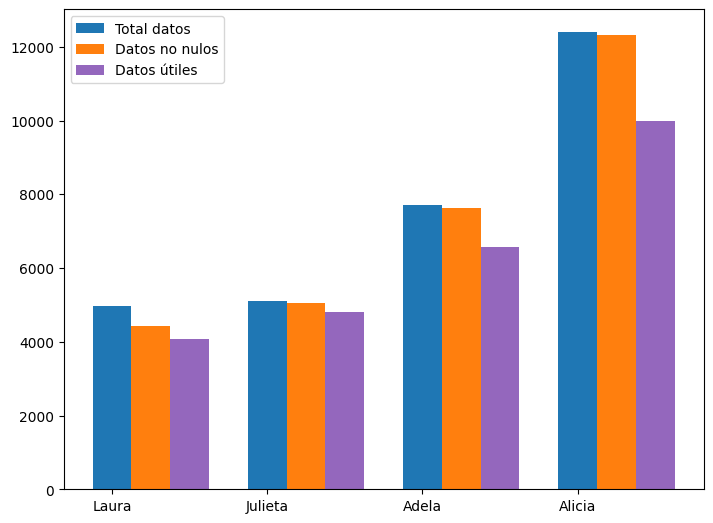

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = [laura_len,
        julieta_len,
        adela_len,
        alicia_len]

data = list(map(list, zip(*data)))

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

group_labels = ['Laura', 'Julieta', 'Adela', 'Alicia']

ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.25, label='Total datos')
ax.bar(X + 0.25, data[1], color = 'tab:orange', width = 0.25, label='Datos no nulos')
ax.bar(X + 0.50, data[2], color = 'tab:purple', width = 0.25, label='Datos útiles')

ax.set_xticks(X)
ax.set_xticklabels(group_labels)

plt.legend();

In [7]:
from utils.cargar import fase

data = []

for etapa in ['Ind1','Grup','Ind2']:
    data_ind = []
    for i in [1,2,3,4,5,6]:
        try:
            data_ind.append(fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i])
        except KeyError:
            data_ind.append(0)
    data.append(data_ind)
        

# [[fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i] for i in ['1,2,3,4,5']] for etapa in ['Ind1','Grup','Ind2']]
# data

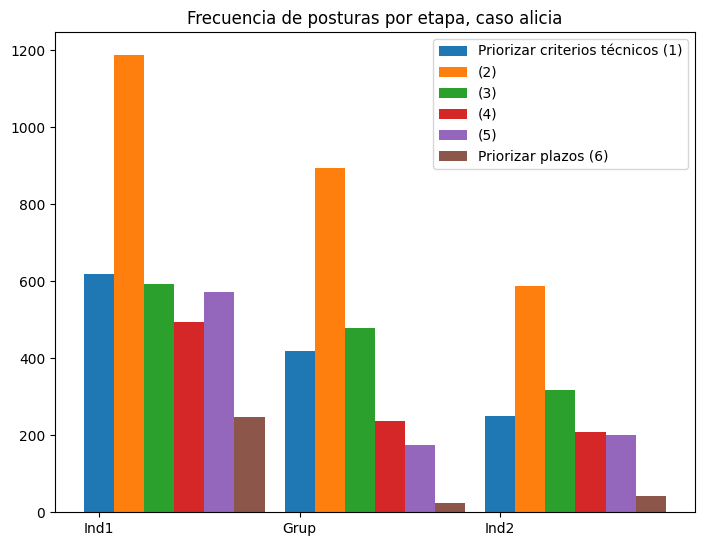

In [8]:
data = []

for etapa in ['Ind1','Grup','Ind2']:
    data_ind = []
    for i in [1,2,3,4,5,6]:
        try:
            data_ind.append(fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i])
        except KeyError:
            data_ind.append(0)
    data.append(data_ind)
        
data

data = list(map(list, zip(*data)))

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

group_labels = ['Ind1', 'Grup', 'Ind2']

ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.15, label='Priorizar criterios técnicos (1)')
ax.bar(X + 0.15, data[1], color = 'tab:orange', width = 0.15, label='(2)')
ax.bar(X + 0.30, data[2], color = 'tab:green', width = 0.15, label='(3)')
ax.bar(X + 0.45, data[3], color = 'tab:red', width = 0.15, label='(4)')
ax.bar(X + 0.60, data[4], color = 'tab:purple', width = 0.15, label='(5)')
ax.bar(X + 0.75, data[5], color = 'tab:brown', width = 0.15, label='Priorizar plazos (6)')

plt.title("Frecuencia de posturas por etapa, caso {}".format('alicia'))

ax.set_xticks(X)
ax.set_xticklabels(group_labels)

plt.legend();

In [9]:
def visualise_freqs(df,caso,izq,der):

    data = []

    for etapa in ['Ind1','Grup','Ind2']:
        data_ind = []
        for i in [1,2,3,4,5,6]:
            try:
                data_ind.append(fase(df,etapa,caso)['sel'].value_counts()[i])
            except KeyError:
                data_ind.append(0)
        data.append(data_ind)

    data = list(map(list, zip(*data)))

    X = np.arange(3)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    group_labels = ['Ind1', 'Grup', 'Ind2']

    ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.15, label=izq+' (1)')
    ax.bar(X + 0.15, data[1], color = 'tab:orange', width = 0.15, label='(2)')
    ax.bar(X + 0.30, data[2], color = 'tab:green', width = 0.15, label='(3)')
    ax.bar(X + 0.45, data[3], color = 'tab:red', width = 0.15, label='(4)')
    ax.bar(X + 0.60, data[4], color = 'tab:purple', width = 0.15, label='(5)')
    ax.bar(X + 0.75, data[5], color = 'tab:brown', width = 0.15, label=der+' (6)')

    ax.set_xticks(X)
    ax.set_xticklabels(group_labels)

    plt.title("Frecuencia de posturas por etapa, caso {}".format(caso))

    plt.legend();

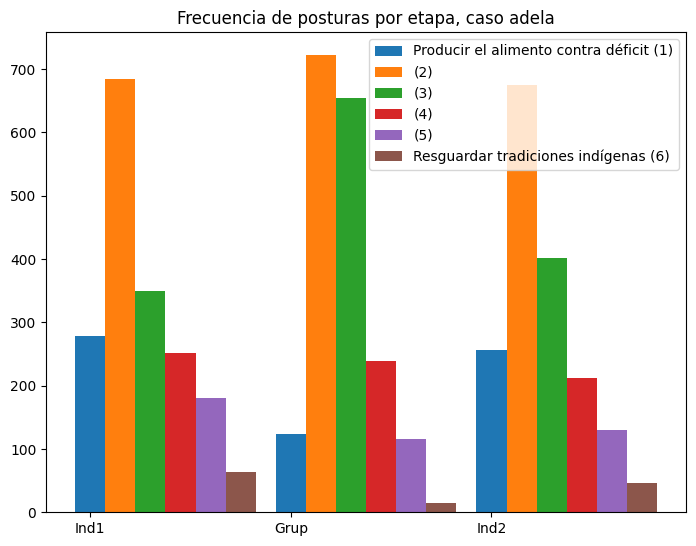

In [10]:
visualise_freqs(df_adela,'adela','Producir el alimento contra déficit','Resguardar tradiciones indígenas')

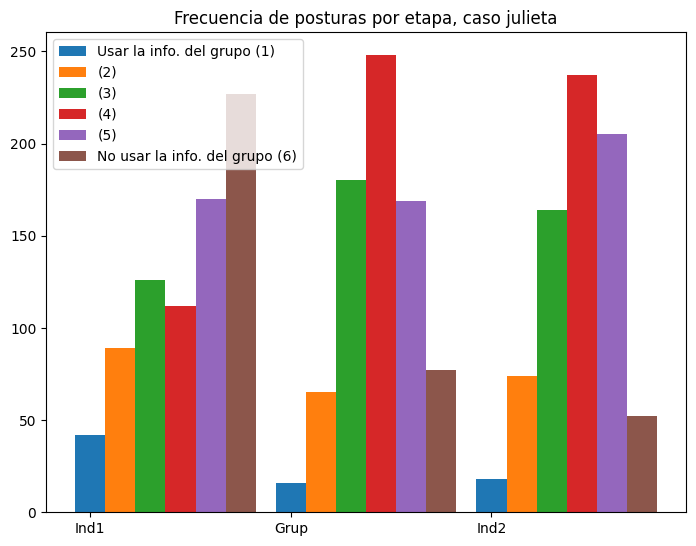

In [12]:
visualise_freqs(df_julieta,'julieta','Usar la info. del grupo','No usar la info. del grupo')

---

In [1]:
from utils.cargar import df_caso

df_adela = df_caso('adela')

**Adela**

In [3]:
df_adela['opt_left'].value_counts()

opt_left
Preservar el recurso natural escaso                3804
Producir el alimento contra déficit vitamínico     3247
Producir el alimento contra  déficit vitamínico     565
El caso parece muy irreal                            85
adios                                                 8
Tangananica                                           8
Name: count, dtype: int64

In [4]:
df_adela['opt_right'].value_counts()

opt_right
Resguardar las tradiciones identitarias          3812
Beneficiar la salud de niños y ancianos          3804
El caso parece muy verosímil (puede ser real)      85
hola                                                8
Tangaaná                                            8
Name: count, dtype: int64

In [11]:
def procesar_adela(df):
    # procesamiento especial para caso Adela
    df.loc[df['opt_left']=='Producir el alimento contra  déficit vitamínico','opt_left'] = 'Producir el alimento contra déficit vitamínico'
    
    df = df[df['opt_left'] != 'El caso parece muy irreal']
    df = df[df['opt_left'] != 'adios']
    df = df[df['opt_left'] != 'Tangananica']

    return df

In [12]:
df_adela = procesar_adela(df_adela)
df_adela['opt_left'].value_counts()

opt_left
Producir el alimento contra déficit vitamínico    3812
Preservar el recurso natural escaso               3804
Name: count, dtype: int64

**Alicia**

In [5]:
df_alicia = df_caso('alicia')
df_alicia['opt_left'].value_counts()

opt_left
Los criterios técnicos del proyecto y de los usuarios       6070
Por sobre cualquier otra consideración                      3154
Transparencia al mandante y los usuarios                    2943
Los criterios técnicos del proyecto y de los usuario          85
Los criterios  técnicos del  proyecto y de los  usuarios      79
Por sobre  cualquier otra  consideración                      66
Name: count, dtype: int64

In [6]:
df_alicia['opt_right'].value_counts()

opt_right
Los plazos acordados del proyecto                                       6155
Supeditado a las condiciones contextuales                               3130
Tratar de mantener su reputación personal, profesional y empresarial    2943
Los plazos  acordados del  proyecto                                       79
Supeditado a las  condiciones  contextuales                               66
Por sobre cualquier otra consideración                                    24
Name: count, dtype: int64